# Sales Data Analysis

### Import required packages

In [41]:
import pandas as pd #importer pandas
import matplotlib.pyplot as plt  #importer plot pour les graphique
from datetime import datetime , timedelta
import numpy as np

### Import dataset from a csv file

In [42]:
#chargement de dataset
df = pd.read_csv('./Sales Data.csv' , index_col=0)
#affichage des 5 premier lignes
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [43]:
df.tail()  #affichage des 5 dernier lignes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
13621,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


### Check data type

In [44]:
df.dtypes  #afficher les type des colonnes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

### Find missing data

In [45]:
df.isnull().sum()  #check if theres missing data #no missing data
#dataframe.dropna() #on l'utilise pour remplacer les données manquants ppar nan

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

### Statistics to verify the quality of data

In [46]:
df.loc[:,'Sales'].describe()  #decrire le dataframe

count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Sales, dtype: float64

In [47]:
df.info()  #affiche des info sur dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 13621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Hour              185950 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.6+ MB


### Dataframe dimension

In [48]:
df.shape  #affiche les dimmension de dataframe

(185950, 10)

### Add a new column date name that contain the name of the day

In [49]:
#lets split time from date
def dateSplit(dateS):
    l0 = dateS.split(' ')
    l1= l0[0].split('-')
    
    
    day_number = int(l1[2])
    month = int(l1[1])
    year= int(l1[0])
    # Create a date object for the given day, month, and year
    date_object = datetime(year, month, day_number)

    # Get the day name from the date object
    day_name = date_object.strftime("%A")
    
    return day_name




df["Day"] = df["Order Date"].apply(dateSplit)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Monday
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Sunday
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Thursday
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Sunday
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Wednesday


### Add a new column month that contain the number of the month

In [50]:
#let's add Month column
def monthF(x):
    return int(x.split('-')[1])

df['Month'] = df['Order Date'].apply(monthF)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Monday
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Sunday
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Thursday
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Sunday
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Wednesday


In [51]:
#check types after the updates
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
Day                  object
dtype: object

### Calculate the sum of sales by month 

In [52]:
#number of sales by month
pd.DataFrame(df.groupby('Month')['Sales'].sum())

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


### Calculate the sum of product sold by city

In [53]:
pd.DataFrame(df.groupby('City')['City'].count())  #number of sles by city

,City
City,
Atlanta,14881
Austin,9905
Boston,19934
Dallas,14820
Los Angeles,29605
New York City,24876
Portland,12465
San Francisco,44732
Seattle,14732


### plot sales by cities

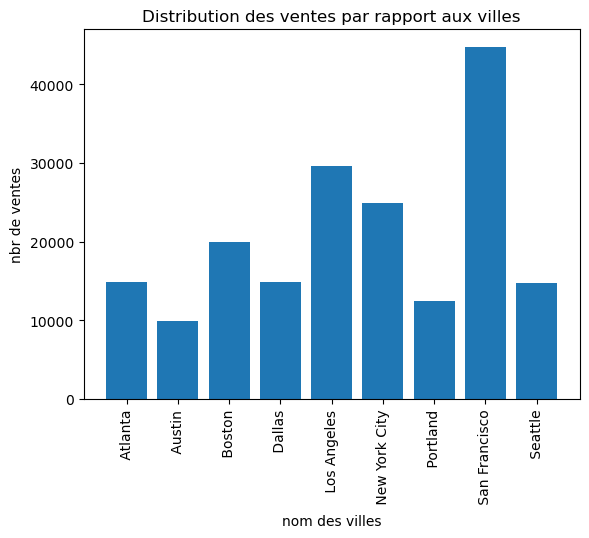

In [54]:
#illuster Distribution des ventes par rapport aux villes
plt.bar(df.groupby('City')['City'].count().index , df.groupby('City')['City'].count() )
plt.xticks(rotation='vertical')
plt.xlabel('nom des villes')
plt.ylabel('nbr de ventes')
plt.title('Distribution des ventes par rapport aux villes')
plt.show()

### plot sales by hour

In [55]:
keys = []
hours= []
#chaque heure dans key et le nombre de ventes convenable dans hours
for key,hour in df.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))

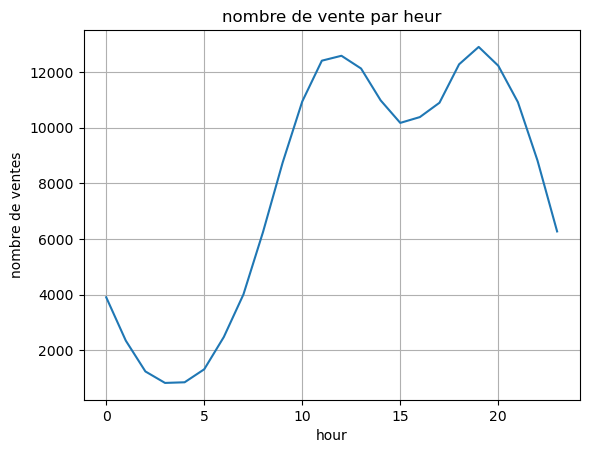

In [56]:
#illuster nombre de vente par heur
plt.grid()
plt.plot(keys, hours)
plt.title('nombre de vente par heur')
plt.xlabel('hour')
plt.ylabel('nombre de ventes')
plt.show()

### Mean of price by product

In [57]:
#moyenne des prix de chaque produit
pd.DataFrame(df.groupby('Product')['Price Each'].mean())

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


### plot mean price by product

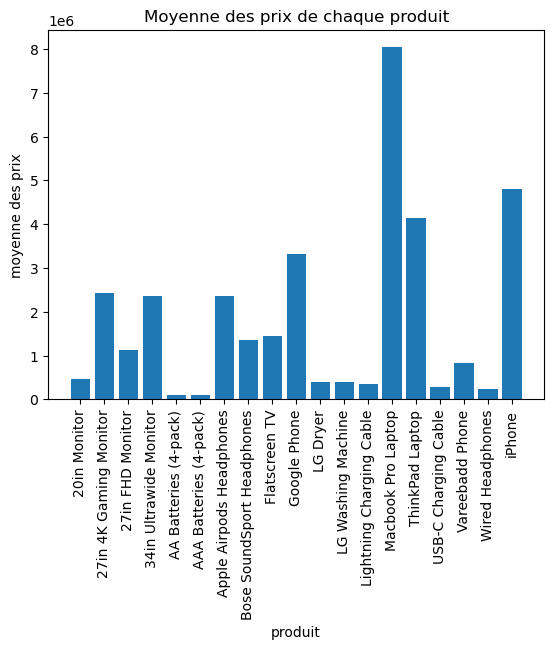

In [58]:
#illustrer Moyenne des prix de chaque produit
prix = df.groupby('Product')['Price Each'].mean()
produit = df.groupby('Product')['Quantity Ordered'].sum().index
quantite = df.groupby('Product')['Quantity Ordered'].sum()

plt.bar(produit , prix*quantite)
plt.xticks(rotation='vertical')
plt.title('Moyenne des prix de chaque produit')
plt.xlabel('produit')
plt.ylabel('moyenne des prix')
plt.show()


### plot quatity and price by product next to each other

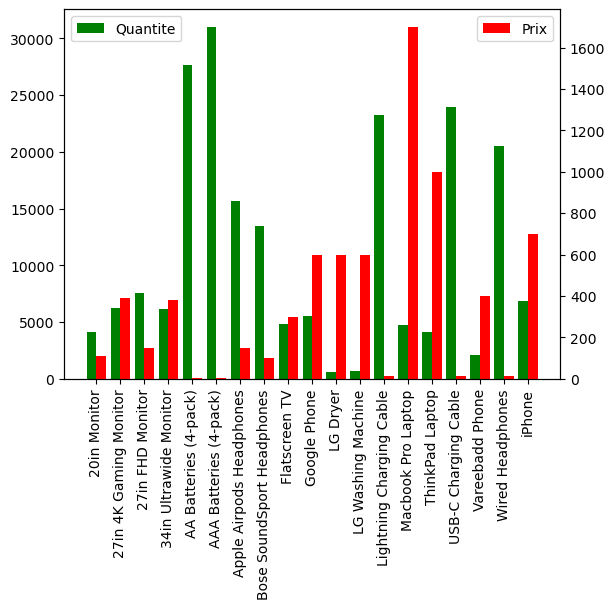

In [59]:
# Calculate the width of each bar
bar_width = 0.4

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot the first bar chart
ax1.bar(np.arange(len(produit)), quantite, width=bar_width, color='g', label='Quantite')

# Create a second y-axis for the second bar chart
ax2 = ax1.twinx()

# Plot the second bar chart with an offset on the x-axis
ax2.bar(np.arange(len(produit)) + bar_width, prix, width=bar_width, color='r', label='Prix')

# Set the x-axis ticks and labels
ax1.set_xticks(np.arange(len(produit)) + bar_width / 2)
ax1.set_xticklabels(produit, rotation='vertical')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

### add column 'commande' to group product that was sold togheder

In [60]:
df['commande'] = df.groupby('Order ID')['Product'].transform(lambda x : ",".join(x))

### 5 most sold group of products

In [61]:
top5_values = df['commande'].value_counts().sort_values(ascending=False).head()
top5_values

commande
Lightning Charging Cable    19831
AAA Batteries (4-pack)      19826
AA Batteries (4-pack)       19809
USB-C Charging Cable        19792
Wired Headphones            17208
Name: count, dtype: int64

### plot 5 most sold products

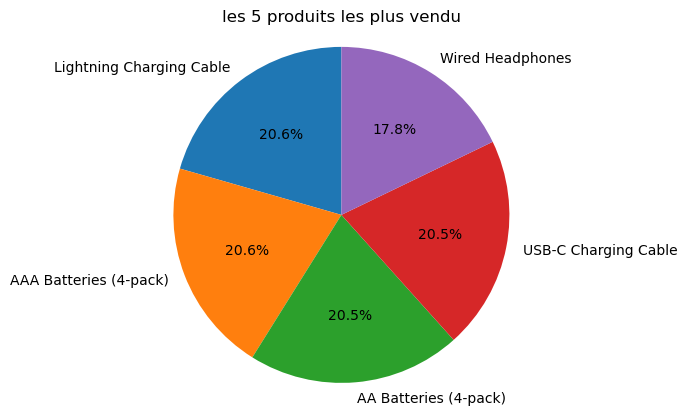

In [62]:
# Create a pie chart++
plt.pie(top5_values, labels=df['commande'].value_counts()[:5].index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('les 5 produits les plus vendu')
plt.show()